In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import time
import datetime
import numba
from multiprocessing import Pool
from functools import partial
from scipy import fftpack, signal

In [34]:
feature_cols = ['timestamp', 'bundle_hash', 'interp_game', 'interp_subgame', 
                'osv_numerical', 'oblast', 'city', 'day_of_week', 'is_weekend', 'hour',
                'dist_from_msk_in_tz_hours']
feature_cols = np.array(feature_cols)

In [82]:
X = np.load("X.npy")
y = np.load("y.npy")
X_test = np.load("X_test.npy")
X[X!=X] = 0
X = X[:, 2:]
feature_cols = feature_cols[2:]

In [83]:
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

In [84]:
X.shape

(44854516, 9)

In [85]:
import sklearn
import sklearn.cluster

In [86]:
kmeans = sklearn.cluster.MiniBatchKMeans(n_clusters=5, random_state=0, verbose=2, batch_size=100000)

In [87]:
kmeans.fit(X)

Init 1/3 with method: k-means++
Inertia for init 1/3: 1711621.625000
Init 2/3 with method: k-means++
Inertia for init 2/3: 1718768.375000
Init 3/3 with method: k-means++
Inertia for init 3/3: 1777074.125000
Minibatch iteration 1/44900: mean batch inertia: 5.726308, ewa inertia: 5.726308 
Minibatch iteration 2/44900: mean batch inertia: 5.726863, ewa inertia: 5.726311 
Minibatch iteration 3/44900: mean batch inertia: 5.658843, ewa inertia: 5.726010 
Minibatch iteration 4/44900: mean batch inertia: 5.644502, ewa inertia: 5.725646 
Minibatch iteration 5/44900: mean batch inertia: 5.606120, ewa inertia: 5.725113 
Minibatch iteration 6/44900: mean batch inertia: 5.636124, ewa inertia: 5.724717 
Minibatch iteration 7/44900: mean batch inertia: 5.600080, ewa inertia: 5.724161 
Minibatch iteration 8/44900: mean batch inertia: 5.595763, ewa inertia: 5.723588 
Minibatch iteration 9/44900: mean batch inertia: 5.588291, ewa inertia: 5.722985 
Minibatch iteration 10/44900: mean batch inertia: 5.565

Minibatch iteration 99/44900: mean batch inertia: 5.450209, ewa inertia: 5.636180 
Minibatch iteration 100/44900: mean batch inertia: 5.416017, ewa inertia: 5.635198 
Minibatch iteration 101/44900: mean batch inertia: 5.447620, ewa inertia: 5.634361 
Minibatch iteration 102/44900: mean batch inertia: 5.447890, ewa inertia: 5.633530 
Minibatch iteration 103/44900: mean batch inertia: 5.415162, ewa inertia: 5.632556 
Minibatch iteration 104/44900: mean batch inertia: 5.416378, ewa inertia: 5.631592 
Minibatch iteration 105/44900: mean batch inertia: 5.414206, ewa inertia: 5.630623 
Minibatch iteration 106/44900: mean batch inertia: 5.436484, ewa inertia: 5.629758 
Minibatch iteration 107/44900: mean batch inertia: 5.428851, ewa inertia: 5.628862 
Minibatch iteration 108/44900: mean batch inertia: 5.471203, ewa inertia: 5.628159 
Minibatch iteration 109/44900: mean batch inertia: 5.433994, ewa inertia: 5.627293 
Minibatch iteration 110/44900: mean batch inertia: 5.426151, ewa inertia: 5.6

Minibatch iteration 198/44900: mean batch inertia: 5.401964, ewa inertia: 5.559180 
Minibatch iteration 199/44900: mean batch inertia: 5.428724, ewa inertia: 5.558598 
Minibatch iteration 200/44900: mean batch inertia: 5.416696, ewa inertia: 5.557965 
Minibatch iteration 201/44900: mean batch inertia: 5.425856, ewa inertia: 5.557376 
Minibatch iteration 202/44900: mean batch inertia: 5.343726, ewa inertia: 5.556424 
Minibatch iteration 203/44900: mean batch inertia: 5.420486, ewa inertia: 5.555818 
Minibatch iteration 204/44900: mean batch inertia: 5.401796, ewa inertia: 5.555131 
Minibatch iteration 205/44900: mean batch inertia: 5.412957, ewa inertia: 5.554497 
Minibatch iteration 206/44900: mean batch inertia: 5.430434, ewa inertia: 5.553944 
Minibatch iteration 207/44900: mean batch inertia: 5.423625, ewa inertia: 5.553363 
Minibatch iteration 208/44900: mean batch inertia: 5.395172, ewa inertia: 5.552657 
Minibatch iteration 209/44900: mean batch inertia: 5.405043, ewa inertia: 5.

Minibatch iteration 297/44900: mean batch inertia: 5.434036, ewa inertia: 5.506373 
Minibatch iteration 298/44900: mean batch inertia: 5.411969, ewa inertia: 5.505952 
Minibatch iteration 299/44900: mean batch inertia: 5.411965, ewa inertia: 5.505533 
Minibatch iteration 300/44900: mean batch inertia: 5.411259, ewa inertia: 5.505112 
Minibatch iteration 301/44900: mean batch inertia: 5.431312, ewa inertia: 5.504783 
Minibatch iteration 302/44900: mean batch inertia: 5.435061, ewa inertia: 5.504473 
Minibatch iteration 303/44900: mean batch inertia: 5.470094, ewa inertia: 5.504319 
Minibatch iteration 304/44900: mean batch inertia: 5.397616, ewa inertia: 5.503843 
Minibatch iteration 305/44900: mean batch inertia: 5.410637, ewa inertia: 5.503428 
Minibatch iteration 306/44900: mean batch inertia: 5.382675, ewa inertia: 5.502889 
Minibatch iteration 307/44900: mean batch inertia: 5.423933, ewa inertia: 5.502537 
Minibatch iteration 308/44900: mean batch inertia: 5.404272, ewa inertia: 5.

Minibatch iteration 396/44900: mean batch inertia: 5.353208, ewa inertia: 5.471206 
Minibatch iteration 397/44900: mean batch inertia: 5.443921, ewa inertia: 5.471085 
Minibatch iteration 398/44900: mean batch inertia: 5.452685, ewa inertia: 5.471003 
Minibatch iteration 399/44900: mean batch inertia: 5.397900, ewa inertia: 5.470677 
Minibatch iteration 400/44900: mean batch inertia: 5.406291, ewa inertia: 5.470390 
Minibatch iteration 401/44900: mean batch inertia: 5.394143, ewa inertia: 5.470050 
Minibatch iteration 402/44900: mean batch inertia: 5.390969, ewa inertia: 5.469697 
Minibatch iteration 403/44900: mean batch inertia: 5.398701, ewa inertia: 5.469380 
Minibatch iteration 404/44900: mean batch inertia: 5.376574, ewa inertia: 5.468967 
Minibatch iteration 405/44900: mean batch inertia: 5.411662, ewa inertia: 5.468711 
Minibatch iteration 406/44900: mean batch inertia: 5.434559, ewa inertia: 5.468559 
Minibatch iteration 407/44900: mean batch inertia: 5.364229, ewa inertia: 5.

Minibatch iteration 495/44900: mean batch inertia: 5.397536, ewa inertia: 5.447039 
Minibatch iteration 496/44900: mean batch inertia: 5.410199, ewa inertia: 5.446875 
Minibatch iteration 497/44900: mean batch inertia: 5.400339, ewa inertia: 5.446667 
Minibatch iteration 498/44900: mean batch inertia: 5.401789, ewa inertia: 5.446467 
Minibatch iteration 499/44900: mean batch inertia: 5.401478, ewa inertia: 5.446266 
Minibatch iteration 500/44900: mean batch inertia: 5.412039, ewa inertia: 5.446114 
Minibatch iteration 501/44900: mean batch inertia: 5.400957, ewa inertia: 5.445912 
Minibatch iteration 502/44900: mean batch inertia: 5.406651, ewa inertia: 5.445737 
Minibatch iteration 503/44900: mean batch inertia: 5.423823, ewa inertia: 5.445640 
Minibatch iteration 504/44900: mean batch inertia: 5.401051, ewa inertia: 5.445441 
Minibatch iteration 505/44900: mean batch inertia: 5.402981, ewa inertia: 5.445252 
Minibatch iteration 506/44900: mean batch inertia: 5.390717, ewa inertia: 5.

Minibatch iteration 594/44900: mean batch inertia: 5.401366, ewa inertia: 5.431733 
Minibatch iteration 595/44900: mean batch inertia: 5.400887, ewa inertia: 5.431595 
Minibatch iteration 596/44900: mean batch inertia: 5.373950, ewa inertia: 5.431338 
Minibatch iteration 597/44900: mean batch inertia: 5.366686, ewa inertia: 5.431050 
Minibatch iteration 598/44900: mean batch inertia: 5.405671, ewa inertia: 5.430937 
Minibatch iteration 599/44900: mean batch inertia: 5.400791, ewa inertia: 5.430802 
Minibatch iteration 600/44900: mean batch inertia: 5.431674, ewa inertia: 5.430806 
Minibatch iteration 601/44900: mean batch inertia: 5.405091, ewa inertia: 5.430692 
Minibatch iteration 602/44900: mean batch inertia: 5.385390, ewa inertia: 5.430490 
Minibatch iteration 603/44900: mean batch inertia: 5.405798, ewa inertia: 5.430379 
Minibatch iteration 604/44900: mean batch inertia: 5.388856, ewa inertia: 5.430194 
Minibatch iteration 605/44900: mean batch inertia: 5.434703, ewa inertia: 5.

Minibatch iteration 693/44900: mean batch inertia: 5.415761, ewa inertia: 5.421293 
Minibatch iteration 694/44900: mean batch inertia: 5.394619, ewa inertia: 5.421174 
Minibatch iteration 695/44900: mean batch inertia: 5.416251, ewa inertia: 5.421152 
Minibatch iteration 696/44900: mean batch inertia: 5.381497, ewa inertia: 5.420975 
Minibatch iteration 697/44900: mean batch inertia: 5.430193, ewa inertia: 5.421016 
Minibatch iteration 698/44900: mean batch inertia: 5.410489, ewa inertia: 5.420969 
Minibatch iteration 699/44900: mean batch inertia: 5.411589, ewa inertia: 5.420928 
Minibatch iteration 700/44900: mean batch inertia: 5.400598, ewa inertia: 5.420837 
Minibatch iteration 701/44900: mean batch inertia: 5.430835, ewa inertia: 5.420882 
Minibatch iteration 702/44900: mean batch inertia: 5.432451, ewa inertia: 5.420933 
Minibatch iteration 703/44900: mean batch inertia: 5.422428, ewa inertia: 5.420940 
Minibatch iteration 704/44900: mean batch inertia: 5.372445, ewa inertia: 5.

Minibatch iteration 792/44900: mean batch inertia: 5.417795, ewa inertia: 5.414949 
Minibatch iteration 793/44900: mean batch inertia: 5.392203, ewa inertia: 5.414848 
Minibatch iteration 794/44900: mean batch inertia: 5.387909, ewa inertia: 5.414728 
Minibatch iteration 795/44900: mean batch inertia: 5.414783, ewa inertia: 5.414728 
Minibatch iteration 796/44900: mean batch inertia: 5.395168, ewa inertia: 5.414641 
Minibatch iteration 797/44900: mean batch inertia: 5.389814, ewa inertia: 5.414530 
Minibatch iteration 798/44900: mean batch inertia: 5.413524, ewa inertia: 5.414525 
Minibatch iteration 799/44900: mean batch inertia: 5.379745, ewa inertia: 5.414370 
Minibatch iteration 800/44900: mean batch inertia: 5.421559, ewa inertia: 5.414402 
Minibatch iteration 801/44900: mean batch inertia: 5.373424, ewa inertia: 5.414220 
Minibatch iteration 802/44900: mean batch inertia: 5.391526, ewa inertia: 5.414118 
Minibatch iteration 803/44900: mean batch inertia: 5.401468, ewa inertia: 5.

Minibatch iteration 891/44900: mean batch inertia: 5.419642, ewa inertia: 5.409149 
Minibatch iteration 892/44900: mean batch inertia: 5.386051, ewa inertia: 5.409046 
Minibatch iteration 893/44900: mean batch inertia: 5.404793, ewa inertia: 5.409027 
Minibatch iteration 894/44900: mean batch inertia: 5.350424, ewa inertia: 5.408766 
Minibatch iteration 895/44900: mean batch inertia: 5.418356, ewa inertia: 5.408809 
Minibatch iteration 896/44900: mean batch inertia: 5.402464, ewa inertia: 5.408780 
Minibatch iteration 897/44900: mean batch inertia: 5.372986, ewa inertia: 5.408621 
Minibatch iteration 898/44900: mean batch inertia: 5.381724, ewa inertia: 5.408501 
Minibatch iteration 899/44900: mean batch inertia: 5.437409, ewa inertia: 5.408630 
Minibatch iteration 900/44900: mean batch inertia: 5.407801, ewa inertia: 5.408626 
Minibatch iteration 901/44900: mean batch inertia: 5.401996, ewa inertia: 5.408596 
Minibatch iteration 902/44900: mean batch inertia: 5.379990, ewa inertia: 5.

Minibatch iteration 990/44900: mean batch inertia: 5.400375, ewa inertia: 5.406139 
Minibatch iteration 991/44900: mean batch inertia: 5.419813, ewa inertia: 5.406200 
Minibatch iteration 992/44900: mean batch inertia: 5.383942, ewa inertia: 5.406101 
Minibatch iteration 993/44900: mean batch inertia: 5.398597, ewa inertia: 5.406068 
Converged (lack of improvement in inertia) at iteration 993/44900
Computing label assignment and total inertia


MiniBatchKMeans(batch_size=100000, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=2)

In [88]:
centers = kmeans.cluster_centers_.T.copy()
print(centers[:, 4], feature_cols[2:][4])
# centers[4] /= 1625
# centers[3] /= 45

print(centers[:, 4], feature_cols[2:][4])


[-0.05385969  0.00915379  0.05271029  0.03527289 -0.08164746  1.438496
  1.8590173   0.13168292  0.02719813] is_weekend
[-0.05385969  0.00915379  0.05271029  0.03527289 -0.08164746  1.438496
  1.8590173   0.13168292  0.02719813] is_weekend


In [89]:
centers.shape

(9, 5)

In [90]:
np.max(centers, axis=0)

array([ 1.4697846,  0.2553268,  1.1685294, 11.53919  ,  1.8590173],
      dtype=float32)

In [94]:
kmeans.labels_.min()

0

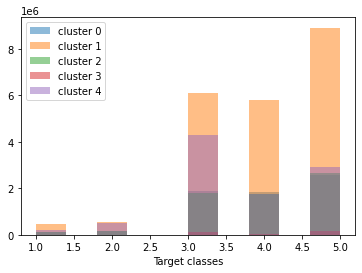

In [109]:
for i in range(5):
    plt.hist(y[kmeans.labels_==i], bins=10, label='cluster ' + str(i), alpha=0.5)
plt.legend()
plt.xlabel("Target classes")
plt.savefig("Dummy clusterization.jpg", dpi=1200)
plt.show()
pass

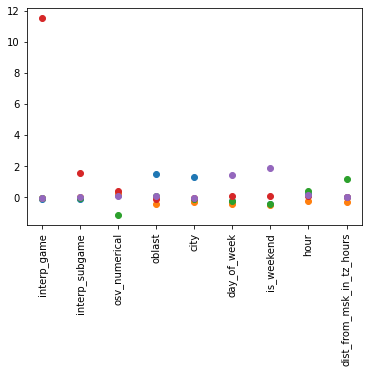

In [92]:
plt.plot(feature_cols, centers, 'o')
plt.xticks(rotation=90)
pass